# Data Exploration

---

## Import packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(10,5))

import seaborn as sns

import pathlib

---

## Setup Folders
As always we start with specifying the data paths:

In [2]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas')
processed_dir = proj_dir / 'processed'


---

## Load Data
We load the data from the last notebook;

In [3]:
#load data frame
df_name = processed_dir / 'caulobacter_combined_filtered_paired_data_full_lin.csv'
df = pd.read_csv(df_name, index_col=0)
df.reset_index(drop=True)
df.head()

uni_par_id   strain       movie_name  replicate  id_colony  id_par  \
0  AKS1088-0-150  AKS1088  AKS1088_TL01_01          0         44     150   
1  AKS1088-0-150  AKS1088  AKS1088_TL01_01          0         44     150   
2  AKS1088-0-150  AKS1088  AKS1088_TL01_01          0         44     150   
3  AKS1088-0-150  AKS1088  AKS1088_TL01_01          0         44     150   
4  AKS1088-0-150  AKS1088  AKS1088_TL01_01          0         44     150   

   frames  generation  age  high_in_old  ...  cdg_norm_new      cdg_dh  \
0      36         2.0    0            0  ...      1.000000  701.015544   
1      37         2.0    1            0  ...      0.981288  687.898477   
2      38         2.0    2            0  ...      0.971520  681.050761   
3      39         2.0    3            0  ...      0.970534  680.359223   
4      40         2.0    4            0  ...      0.962008  674.382883   

       cdg_dl  cdg_norm_dh  cdg_norm_dl     len_dh     len_dl  idc_dh  idc_dl  \
0  725.633166     1.000000     1.035117  27.000000  29.147118     582     151   
1  716.688995     0.981288     1.022358  27.000000  30.231161     582     151   
2  706.654709     0.971520     1.008044  29.000000  31.609030     582     151   
3  708.488987     0.970534     1.010661  31.000000  32.991478     582     151   
4  706.727660     0.962008     1.008148  32.008327  33.569576     582     151   

    rel_cdg  
0  1.035117  
1  1.041853  
2  1.037595  
3  1.041345  
4  1.047962  

[5 rows x 23 columns]

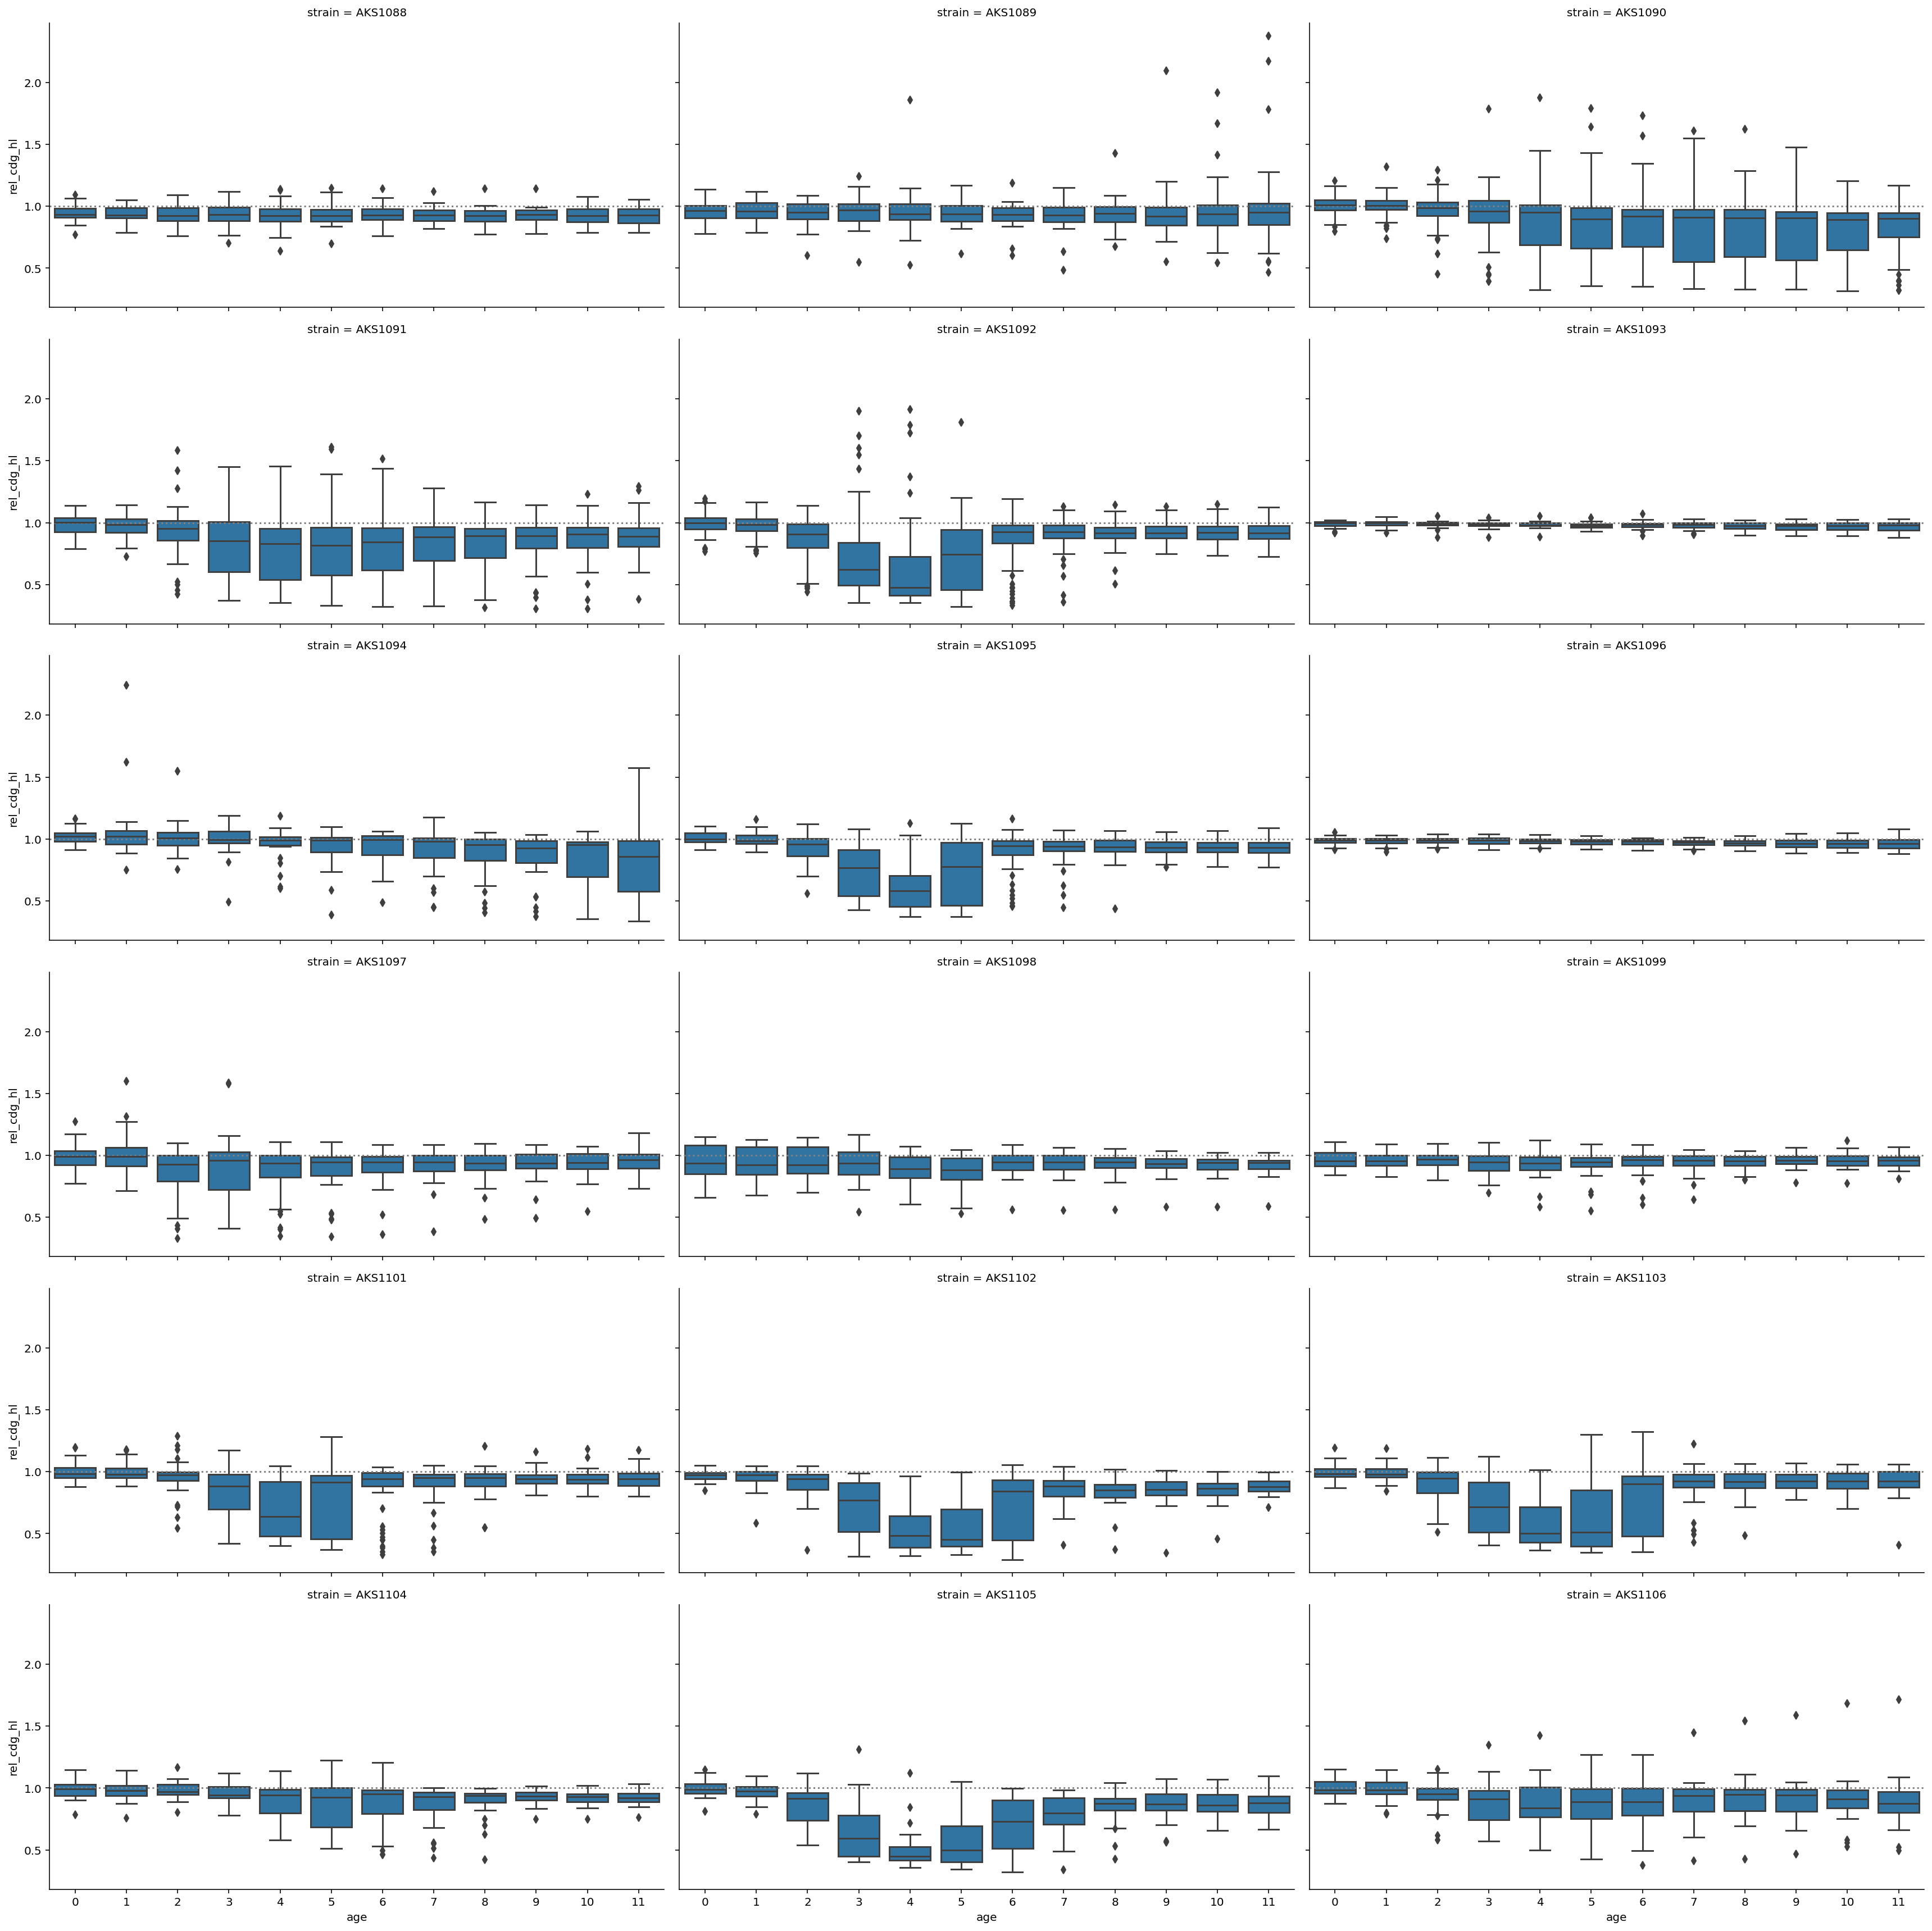

In [31]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df, col="strain", col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.boxplot, "age", "rel_cdg_hl", order=np.arange(12))
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)


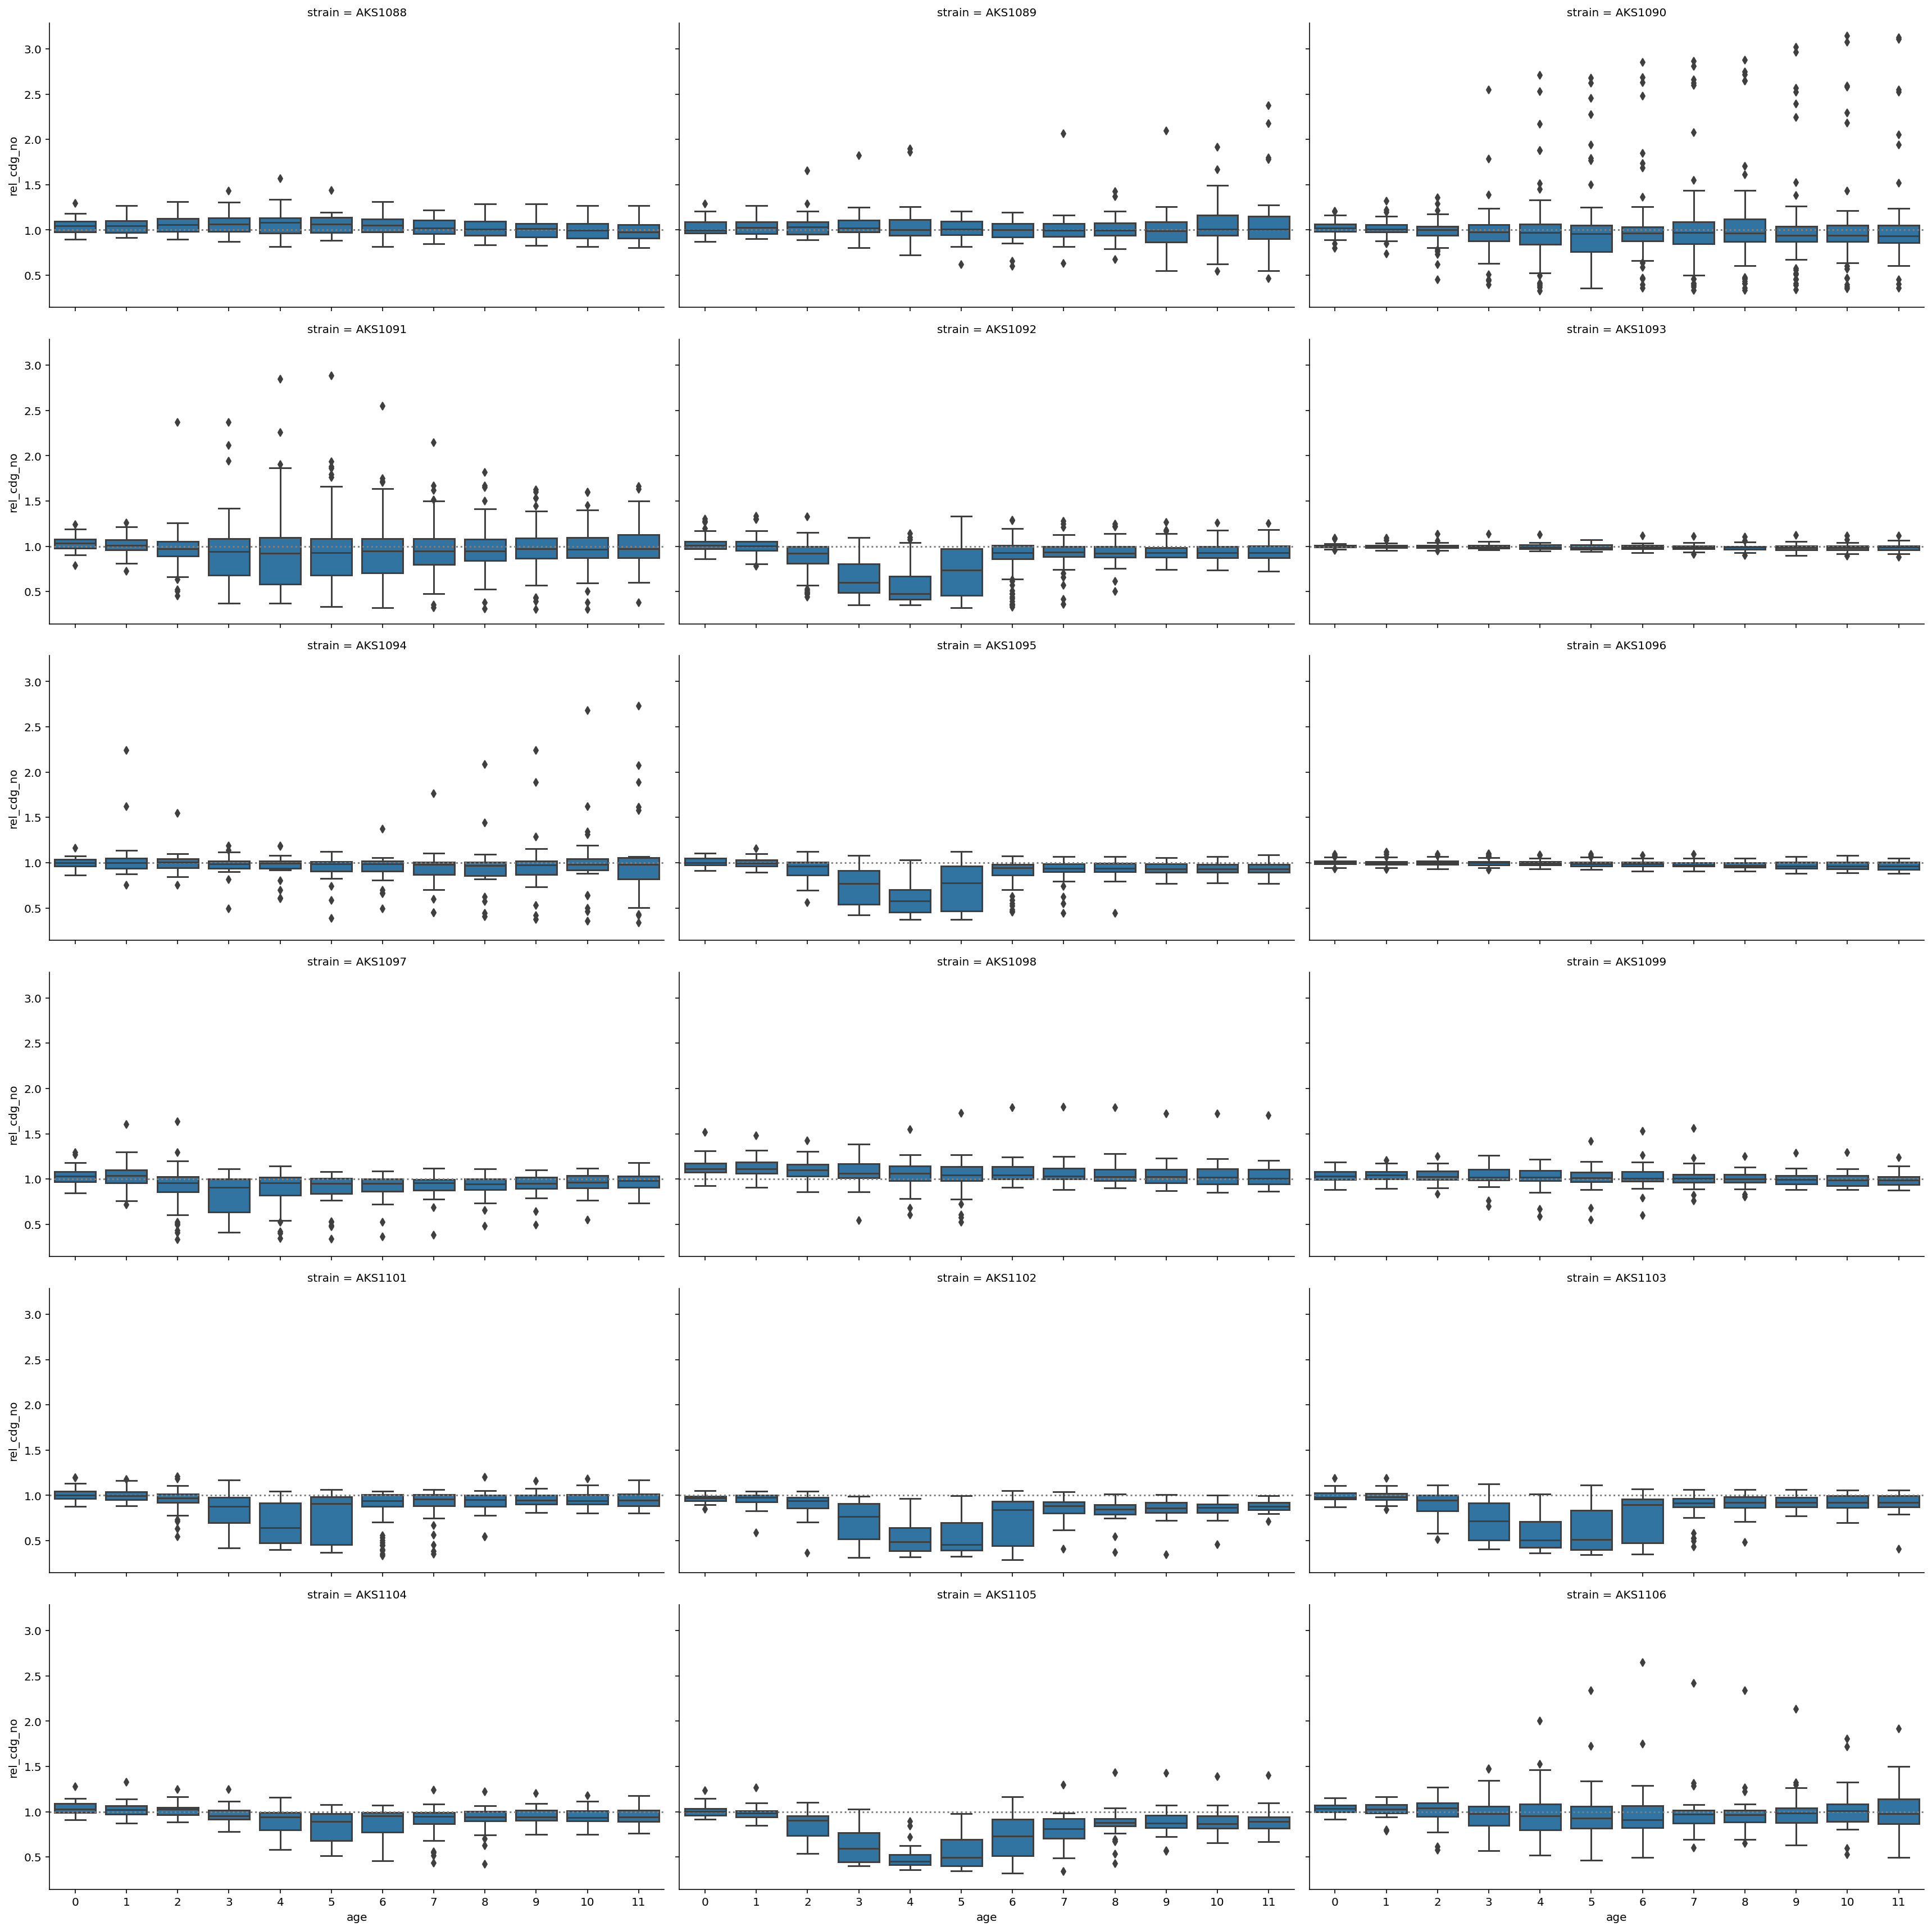

In [32]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df, col="strain", col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.boxplot, "age", "rel_cdg_no", order=np.arange(12))
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

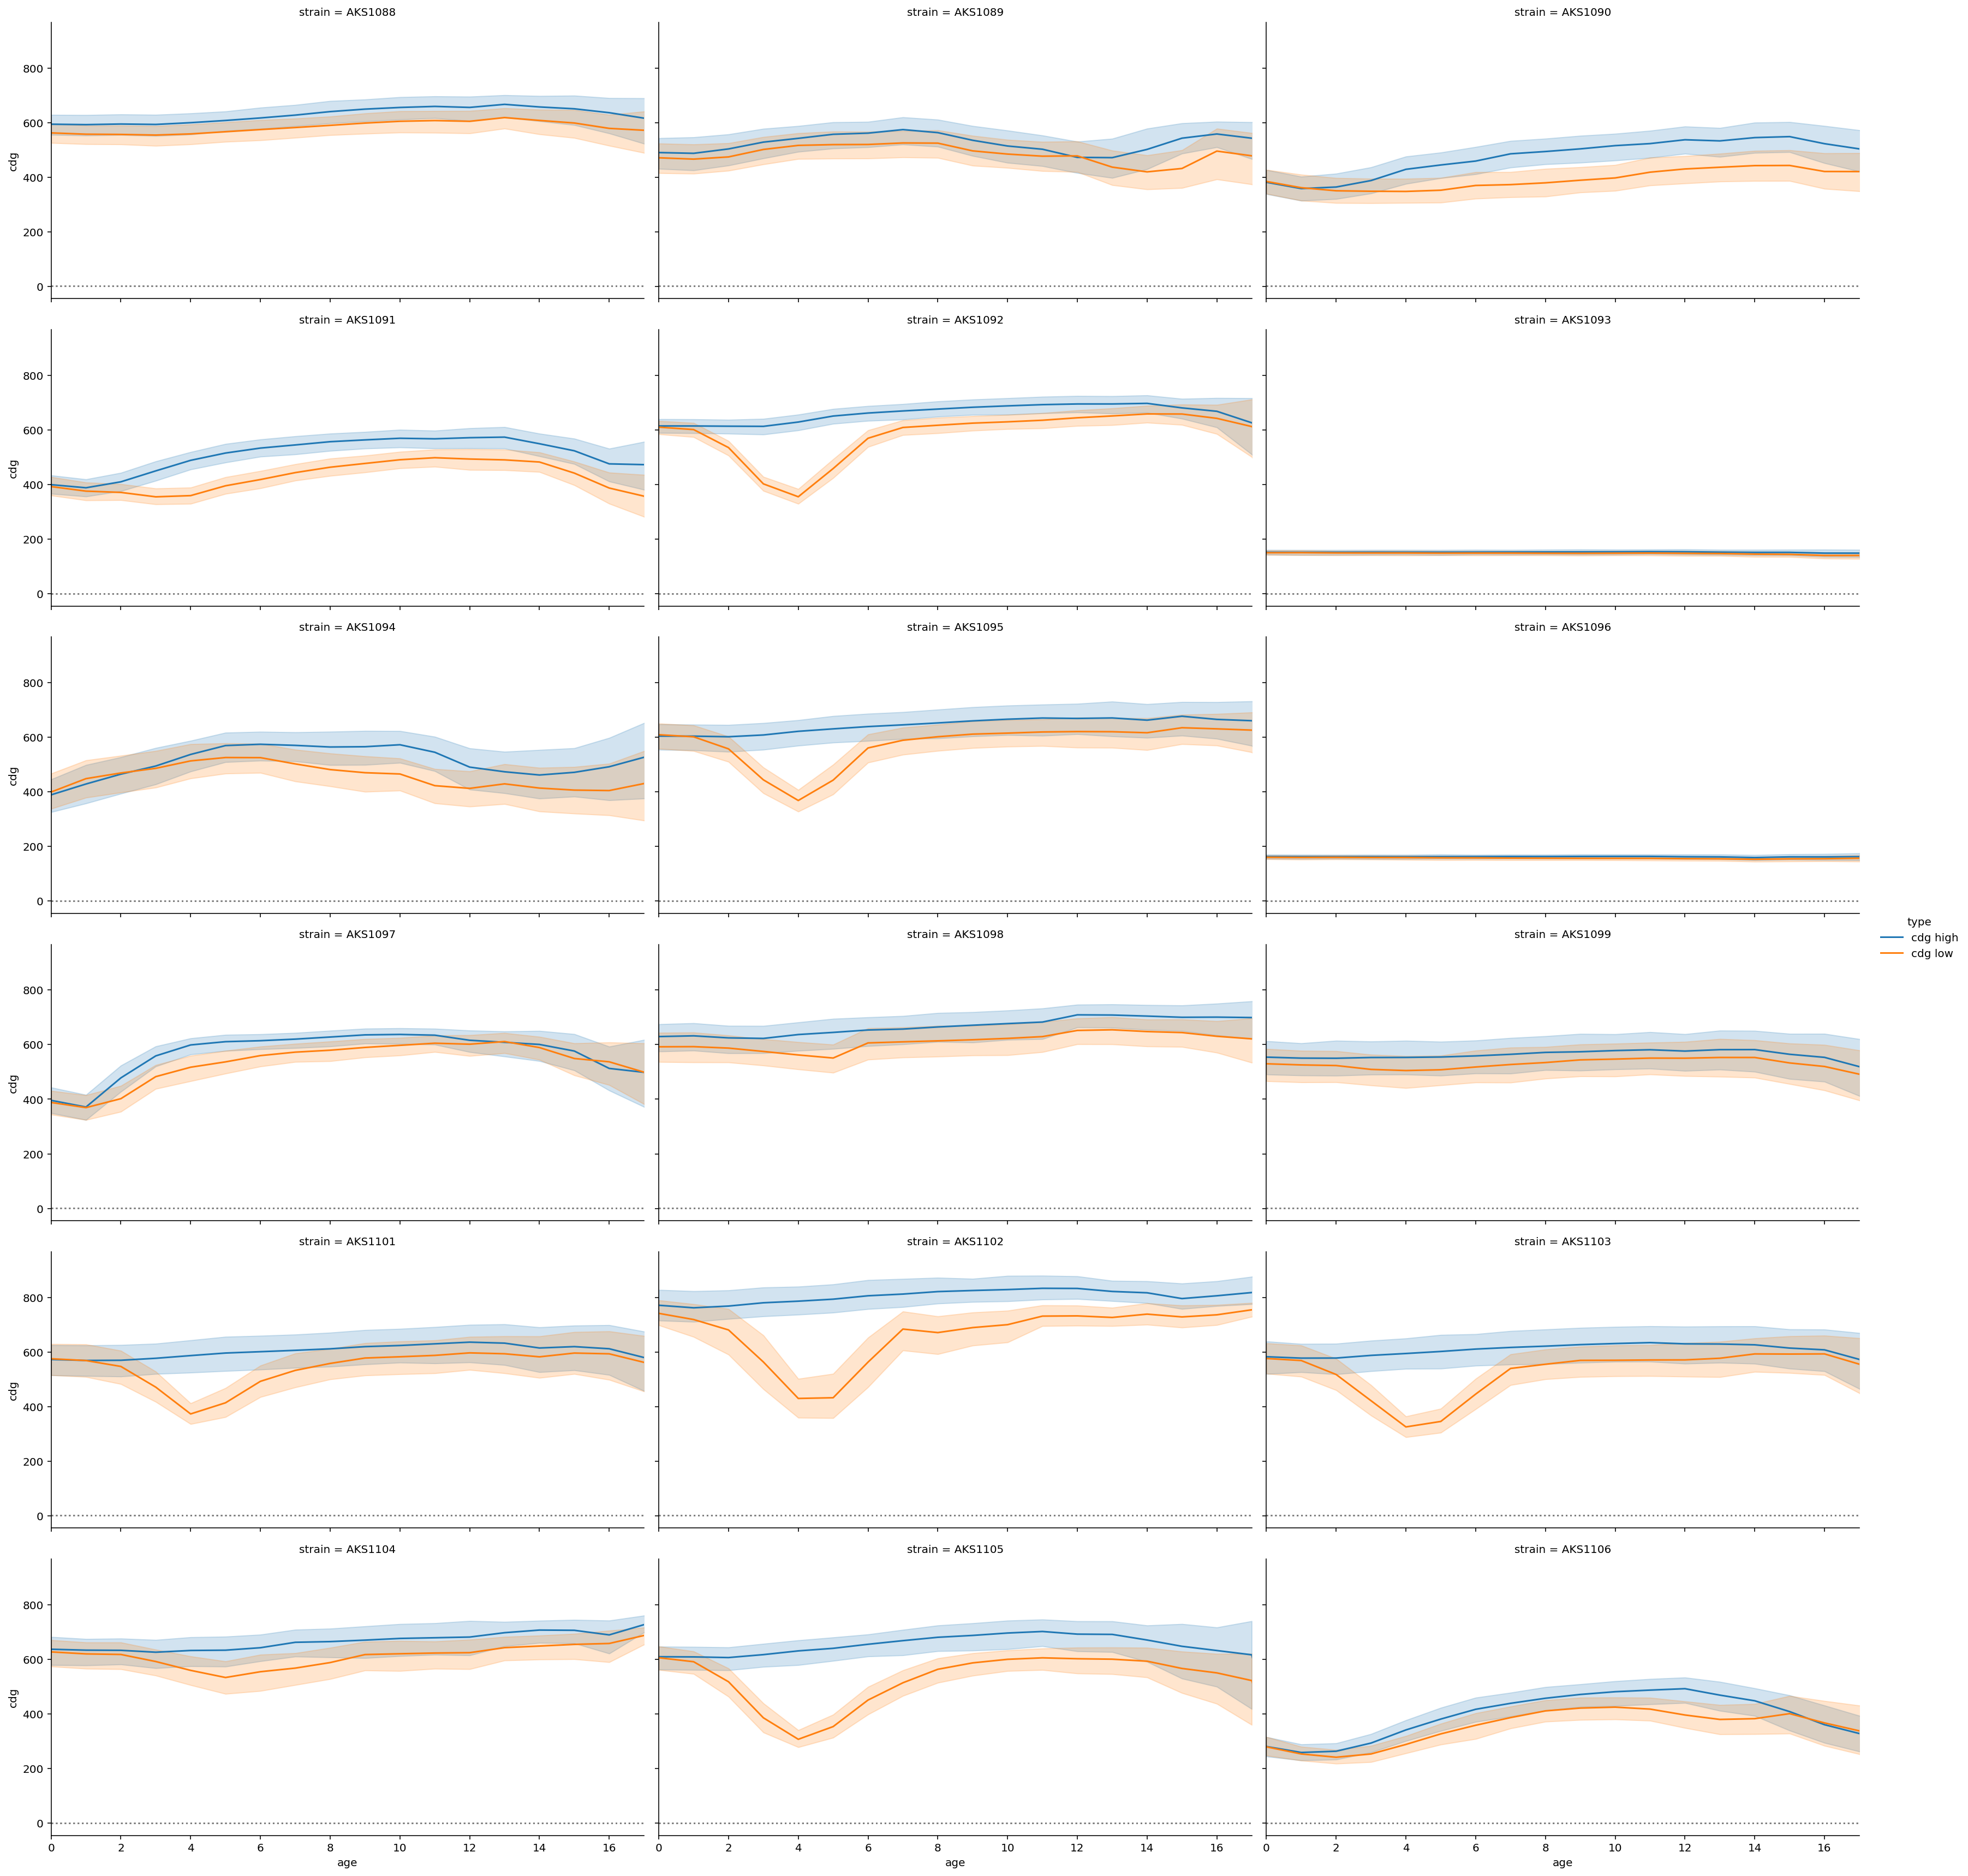

In [19]:
df1 = df[['strain','age','cdg_dh']].copy()
df1['type'] = 'cdg high'
df1['cdg'] = df1['cdg_dh']

df2 = df[['strain','age','cdg_dl']].copy()
df2['type'] = 'cdg low'
df2['cdg'] = df2['cdg_dl']

df_hvl = pd.concat((df1, df2),keys=['strain','age','cdg','type']).reset_index()

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df_hvl, col="strain", hue='type', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.add_legend()
grid.set(xlim=(0, 17))


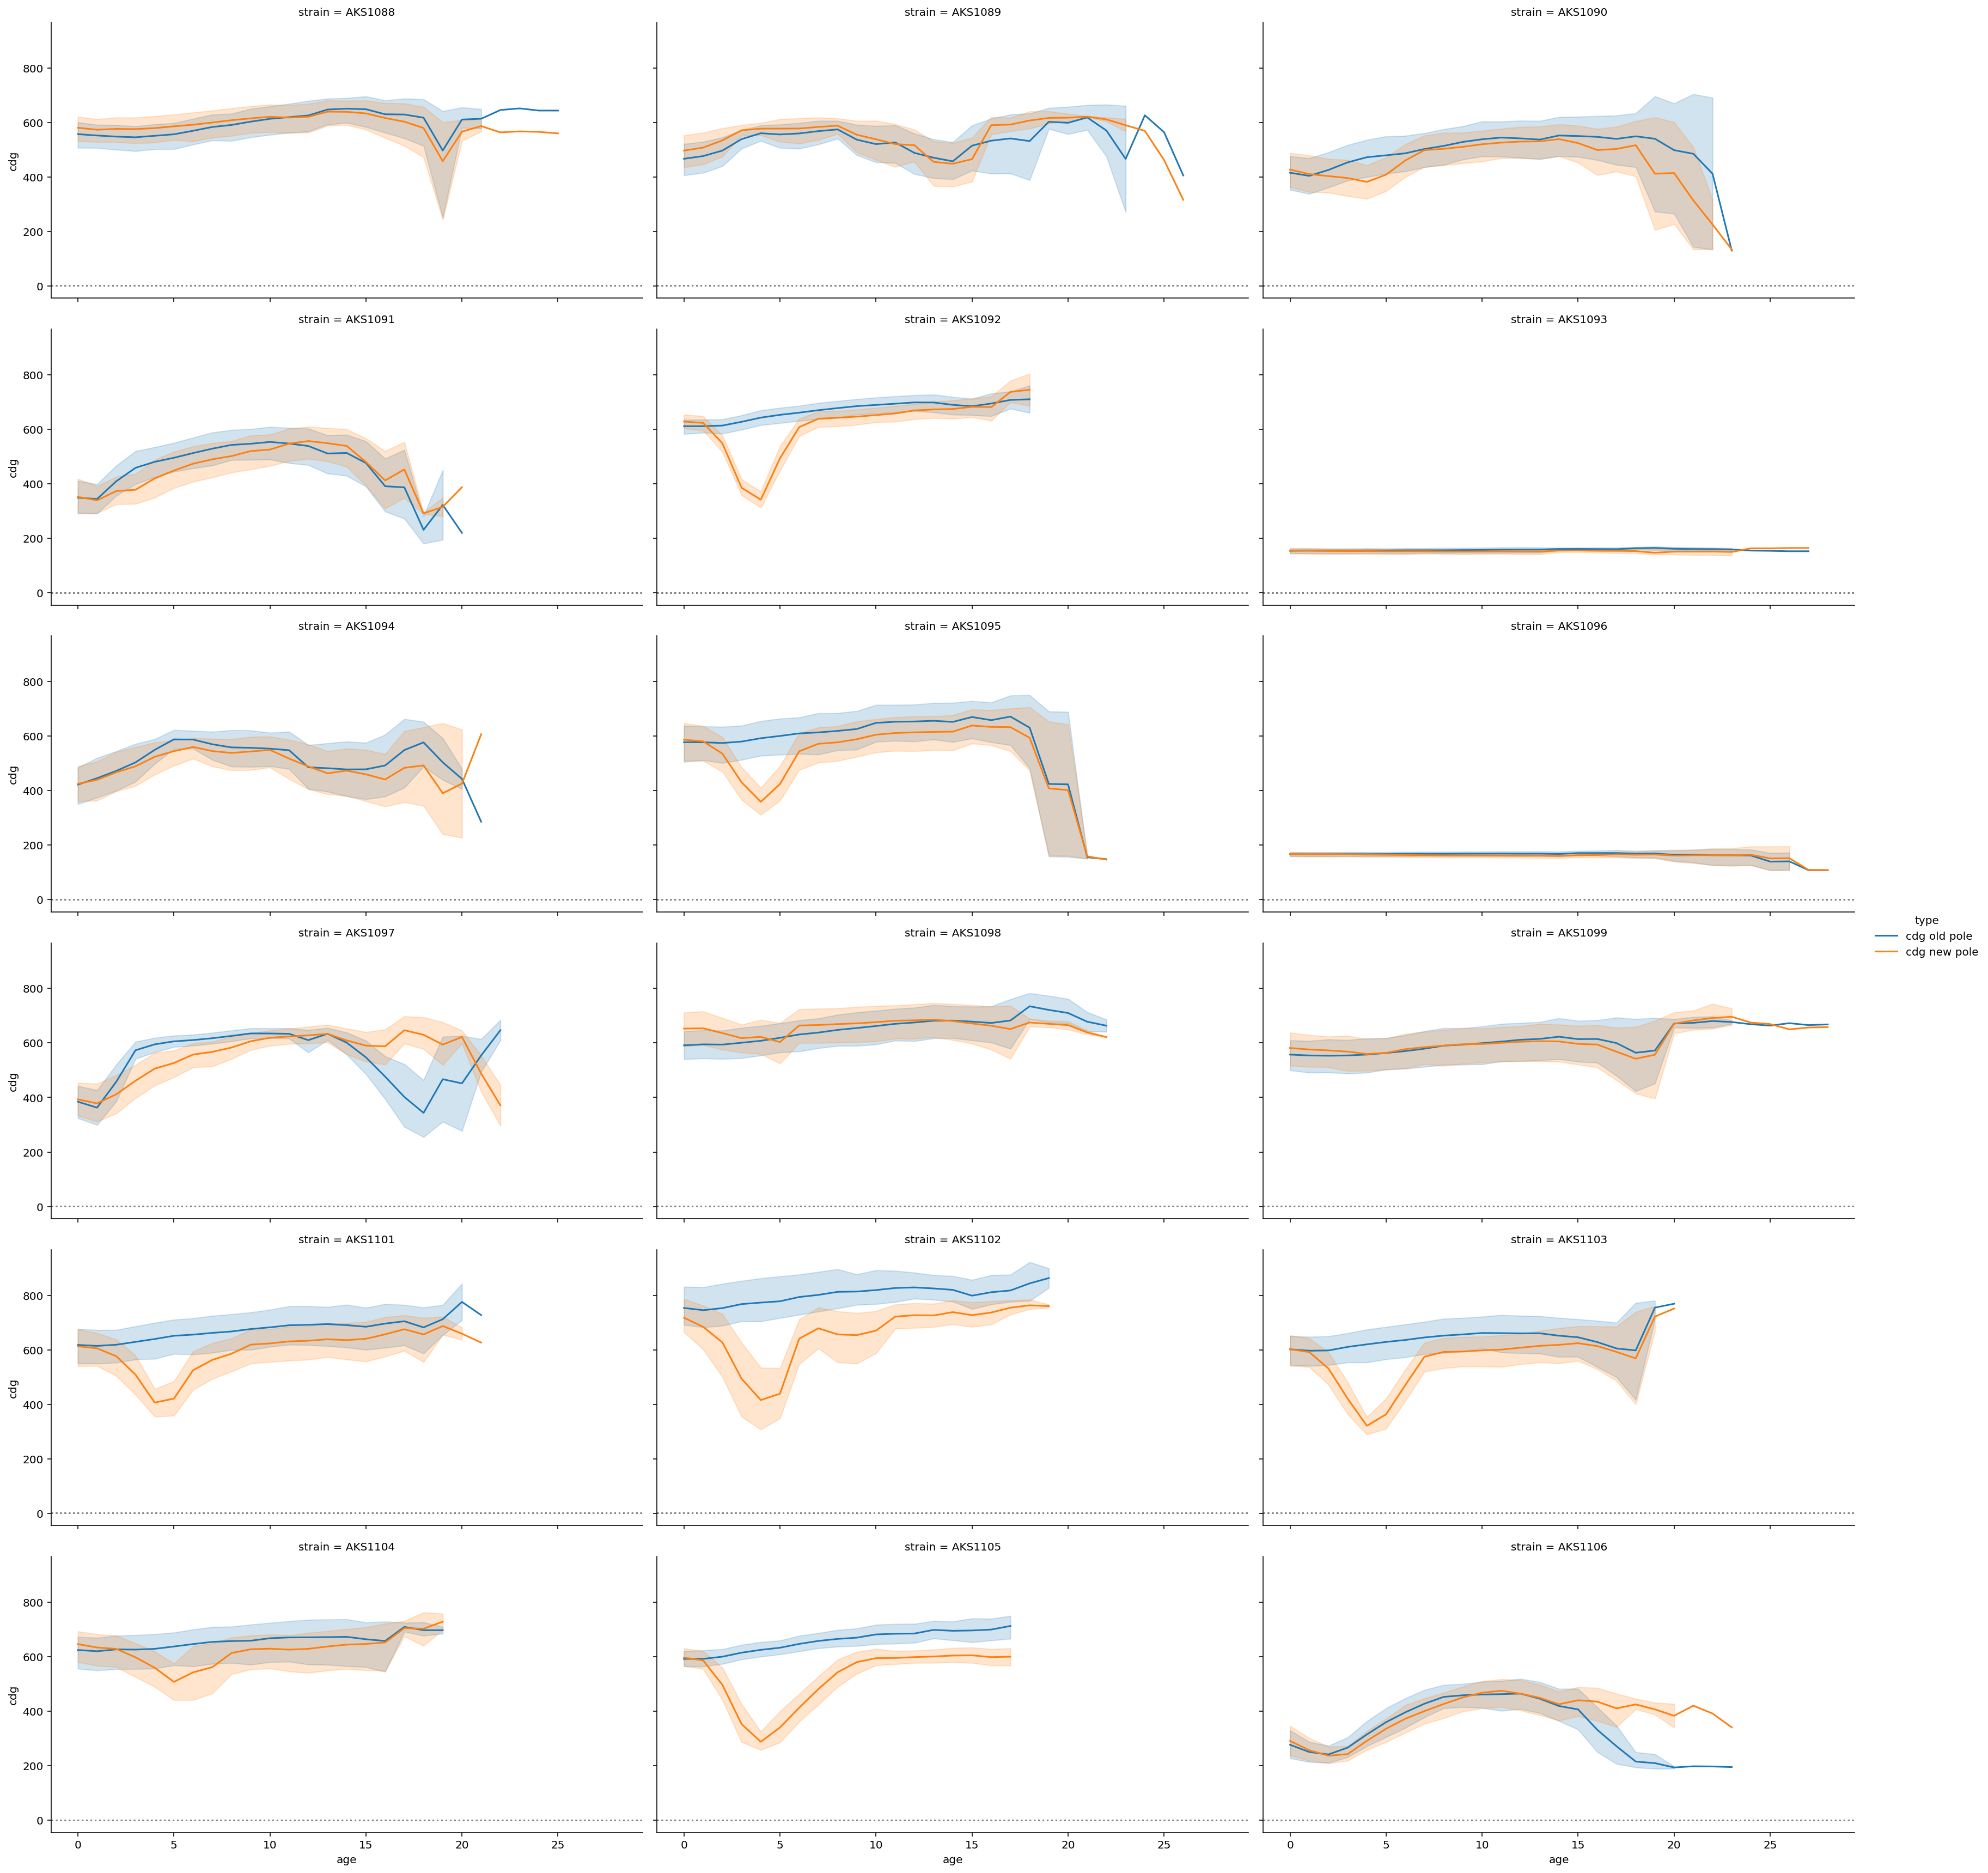

In [5]:
df1 = df[['strain','age','cdg_old', 'generation']].copy()
df1['type'] = 'cdg old pole'
df1['cdg'] = df1['cdg_old']

df2 = df[['strain','age','cdg_new', 'generation']].copy()
df2['type'] = 'cdg new pole'
df2['cdg'] = df2['cdg_new']

df_oldvnew = pd.concat((df1, df2),keys=['strain','age','cdg','type', 'generation']).reset_index()

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df_oldvnew, col="strain", hue='type', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.add_legend()
#grid.set(xlim=(0, 17))

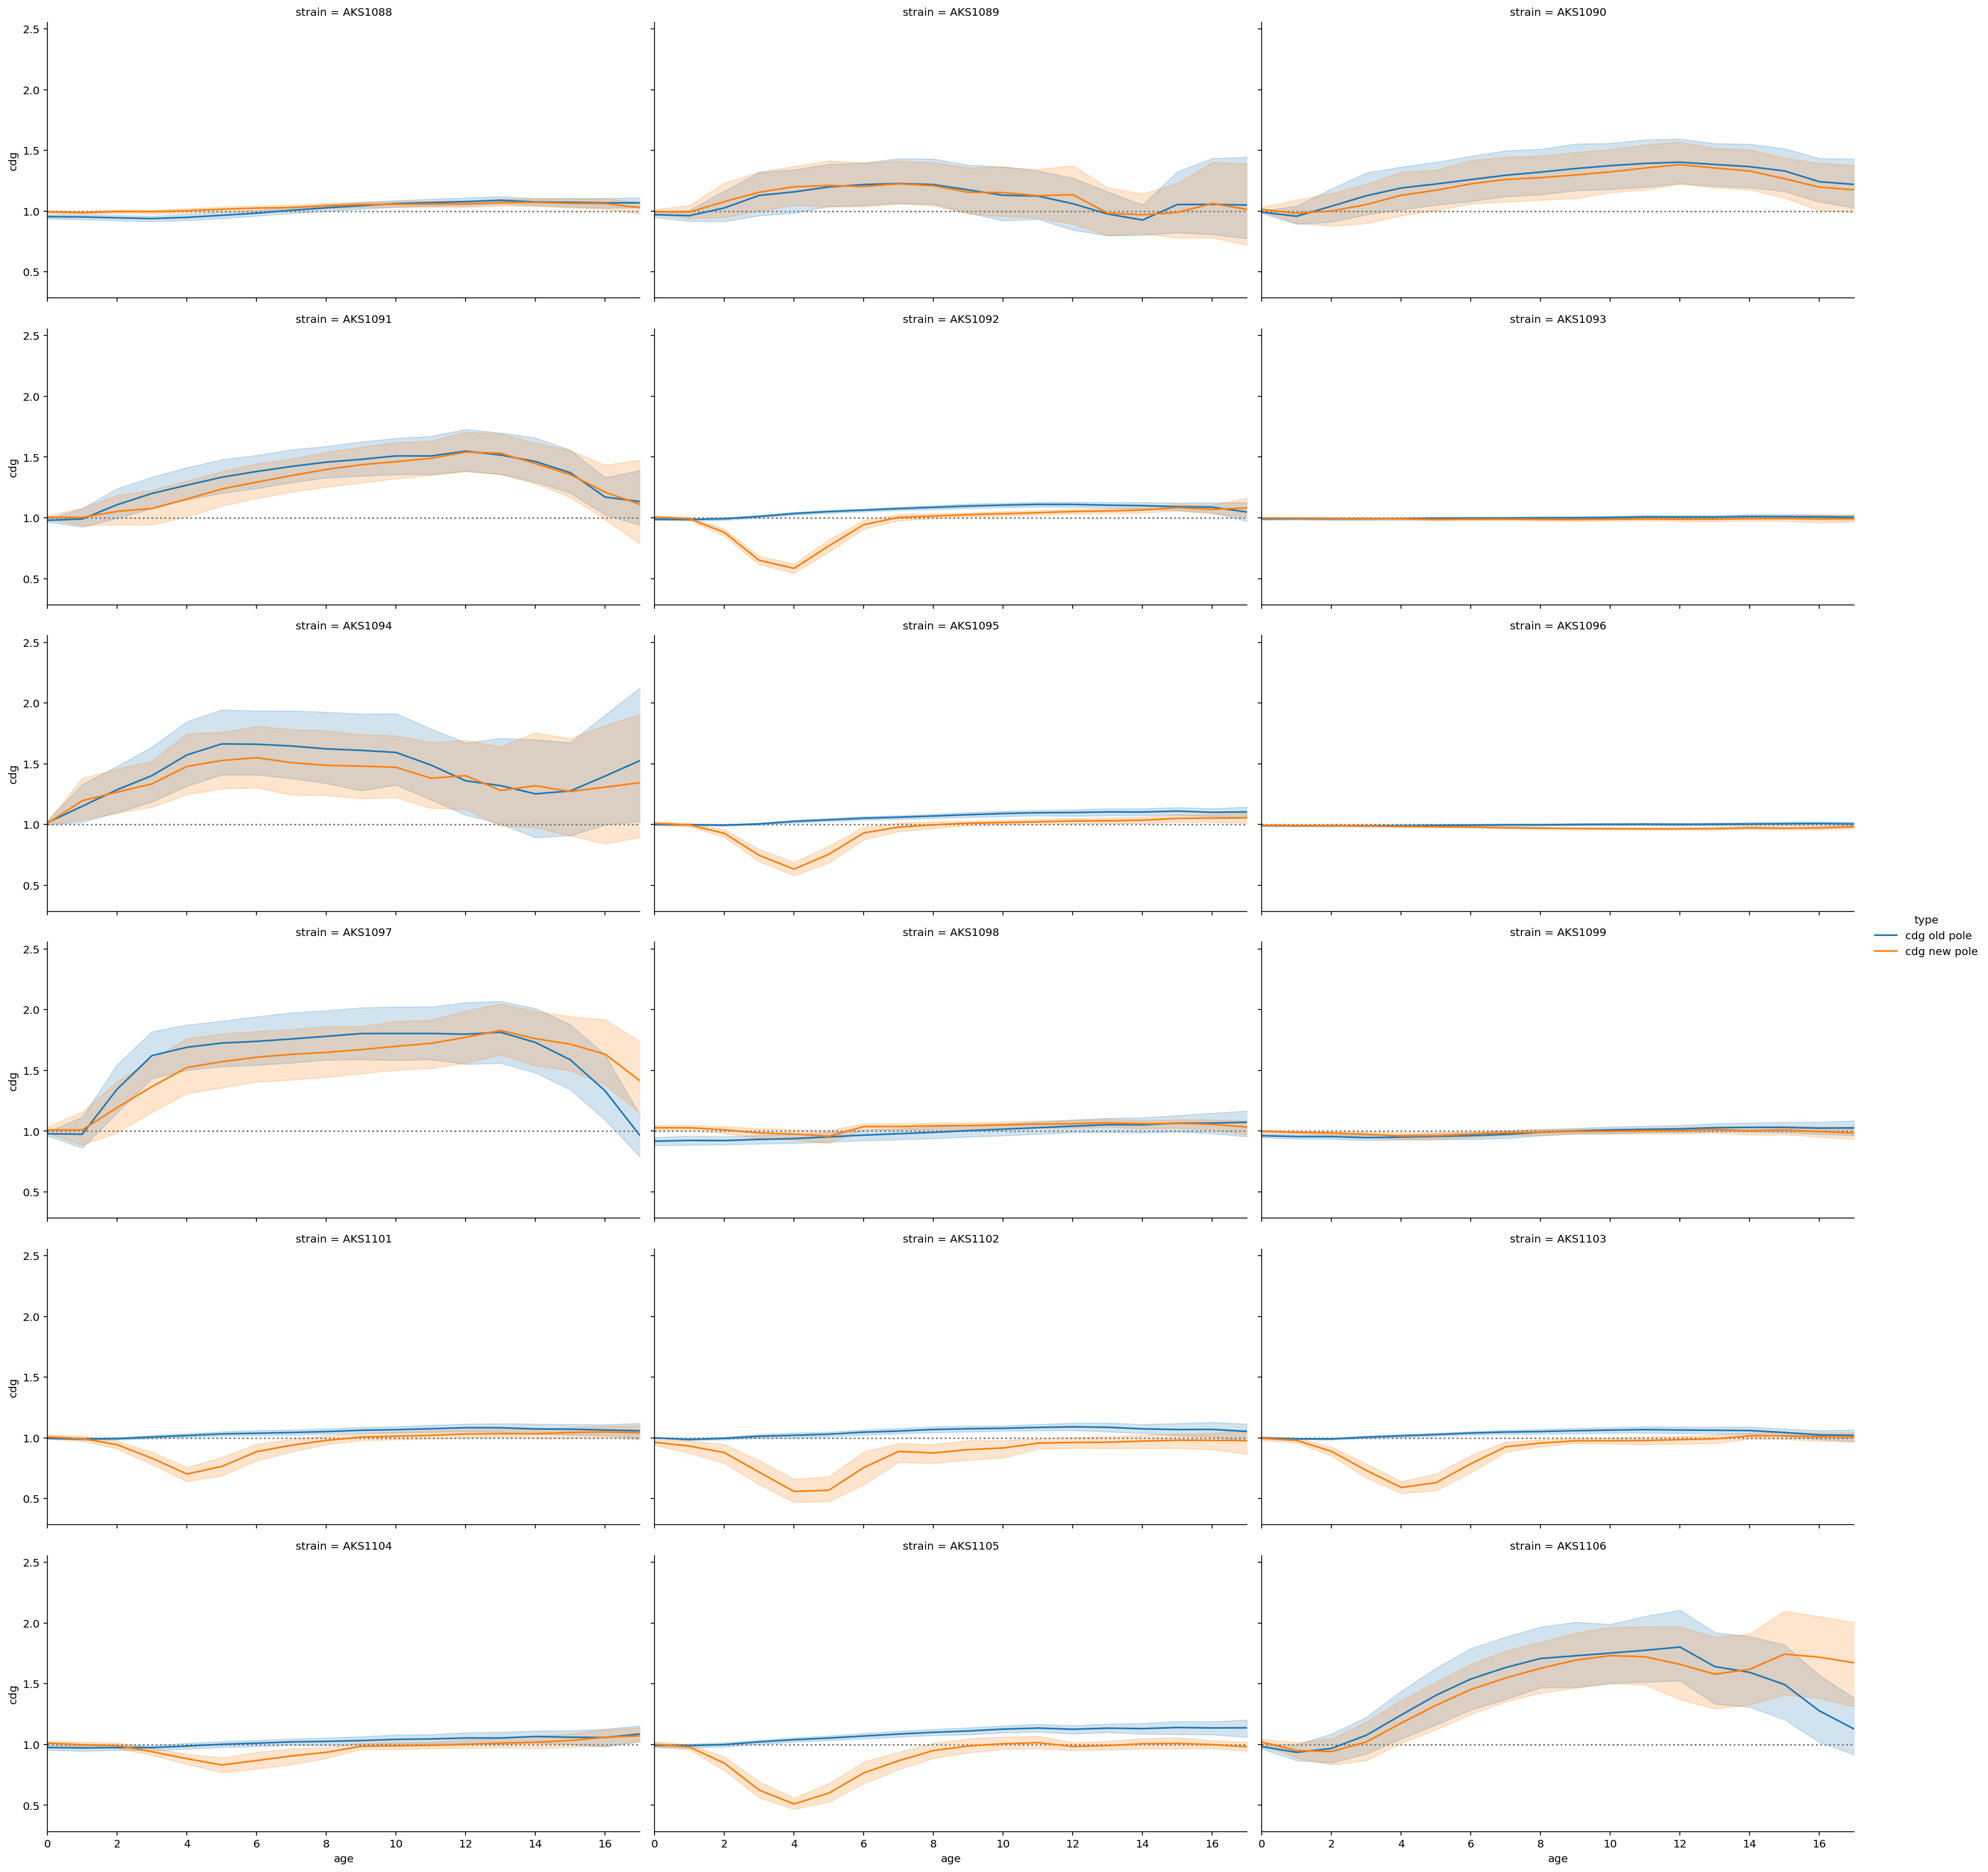

In [36]:
df1 = df[['strain','age','cdg_norm_old']].copy()
df1['type'] = 'cdg old pole'
df1['cdg'] = df1['cdg_norm_old']

df2 = df[['strain','age','cdg_norm_new']].copy()
df2['type'] = 'cdg new pole'
df2['cdg'] = df2['cdg_norm_new']

df_oldvnew_norm = pd.concat((df1, df2),keys=['strain','age','cdg','type']).reset_index()

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df_oldvnew_norm, col="strain", hue='type', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.add_legend()
grid.set(xlim=(0, 17))

<AxesSubplot:xlabel='high_in_old', ylabel='Probability'>

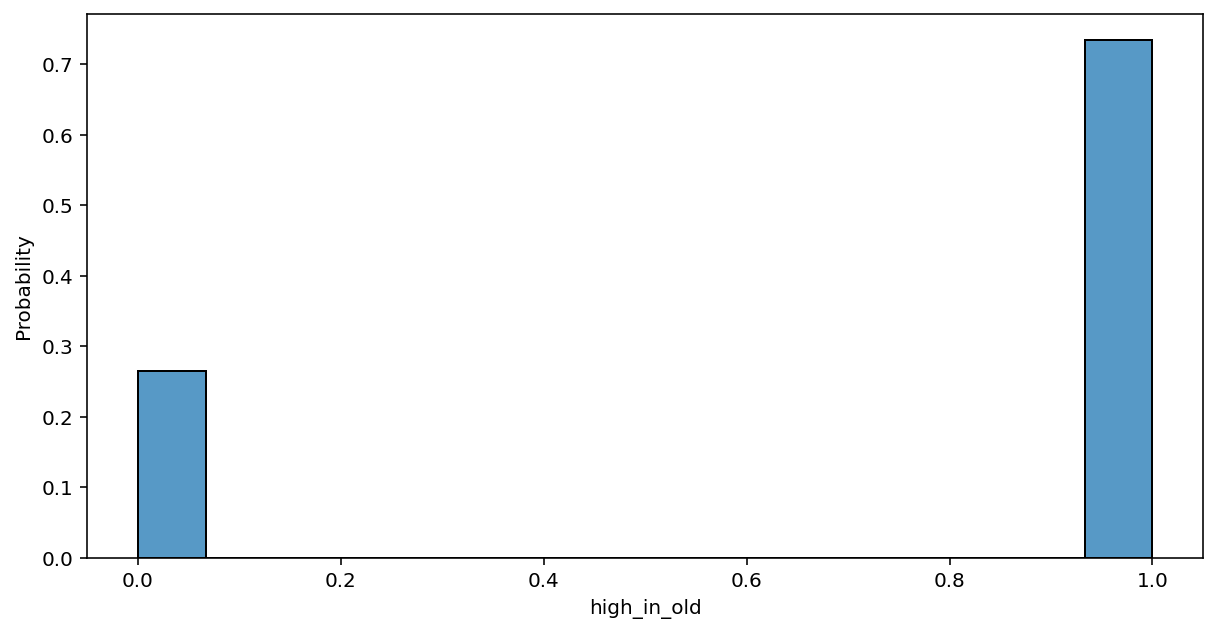

In [25]:
sns.histplot(data=df, x='high_in_old', stat='probability')

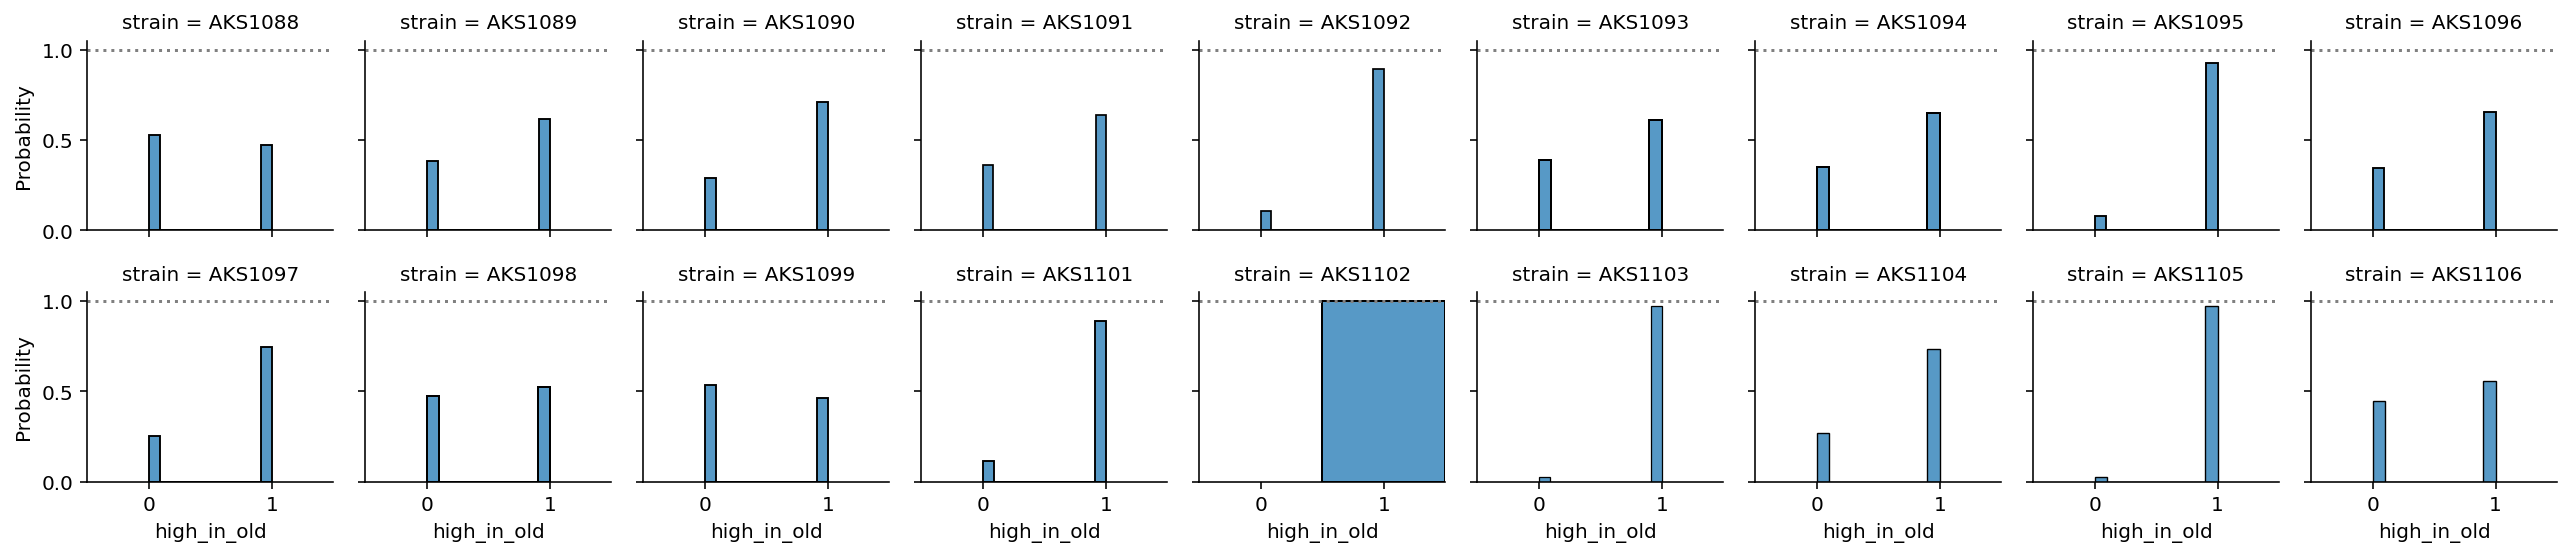

In [29]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df, col="strain", col_wrap=9, height=2, aspect=1)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.histplot, "high_in_old", stat='probability')
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(-0.5, 1.5), xticks=[0, 1])

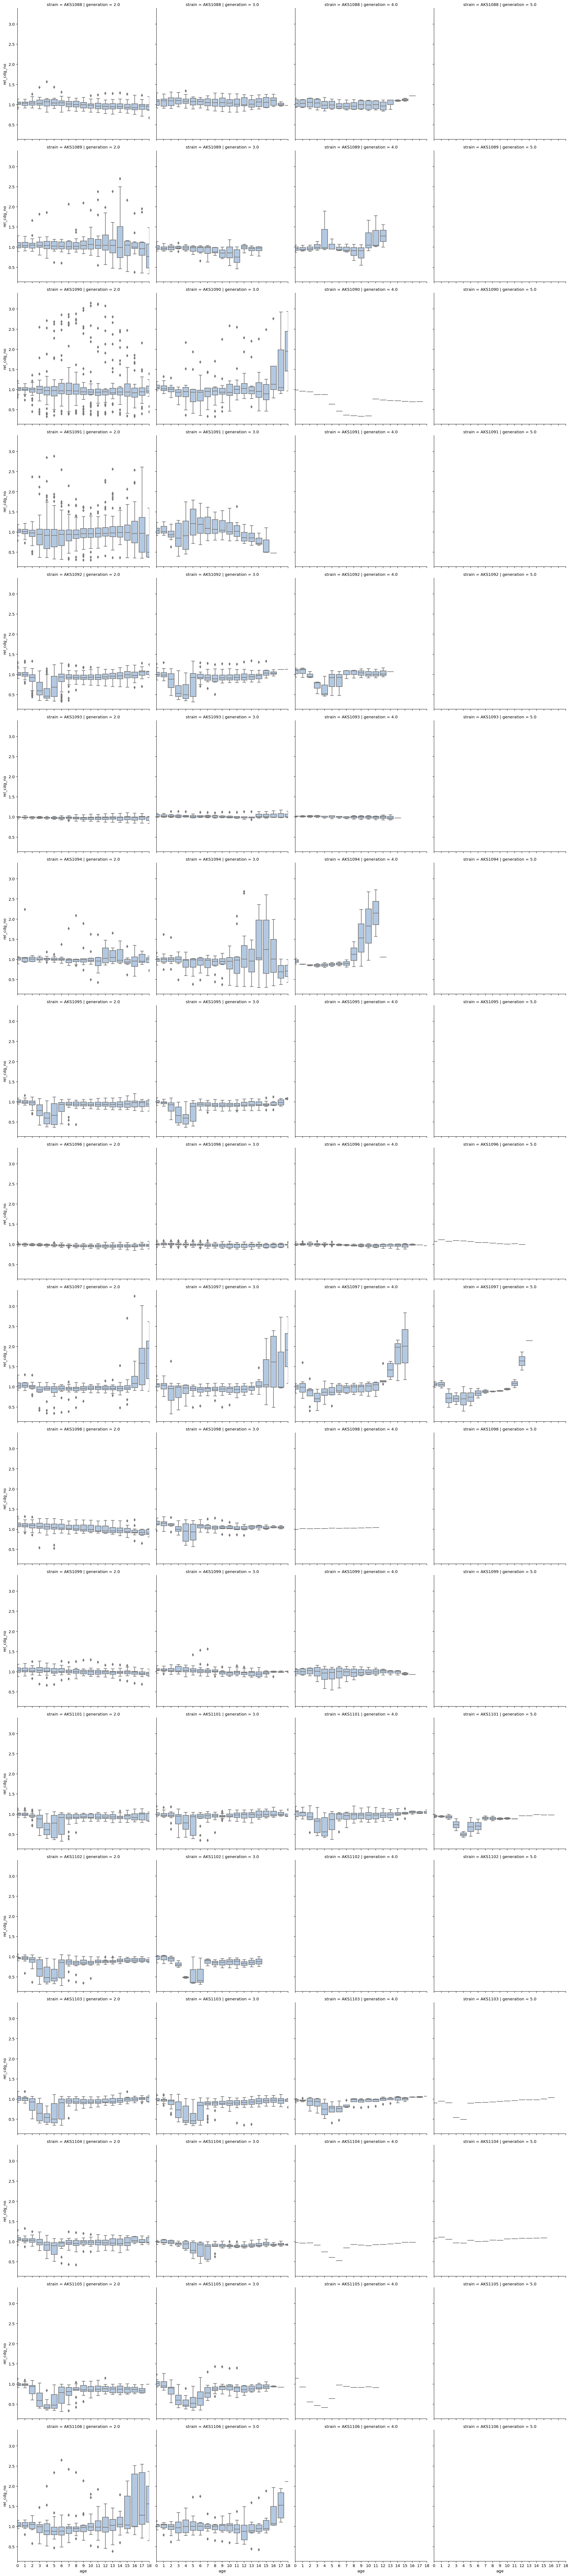

In [45]:
df_clean = df[df['generation']<6].copy()
#df_clean['generation'] = df_clean['generation'].cat.remove_unused_categories()

g = sns.catplot(x="age", y='rel_cdg_no', row="strain",
                   col='generation', data=df_clean,kind ='box',color= '#abc9ea')


g.set(xlim=(0,18))

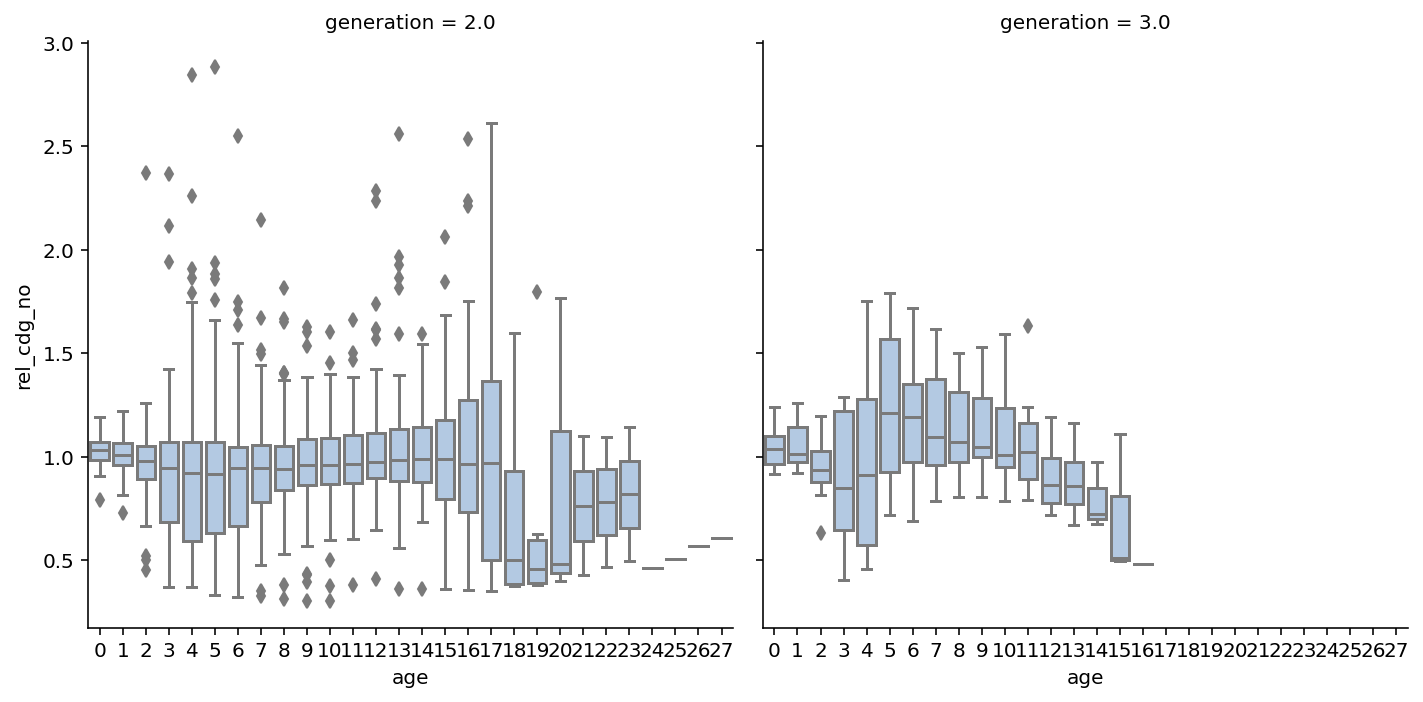

In [47]:
df1091 = df[df['strain']=='AKS1091']
df1091_clean = df1091[df1091['generation']<6].copy()
g = sns.catplot(x="age", y='rel_cdg_no', col='generation', data=df1091_clean,kind ='box',color= '#abc9ea')

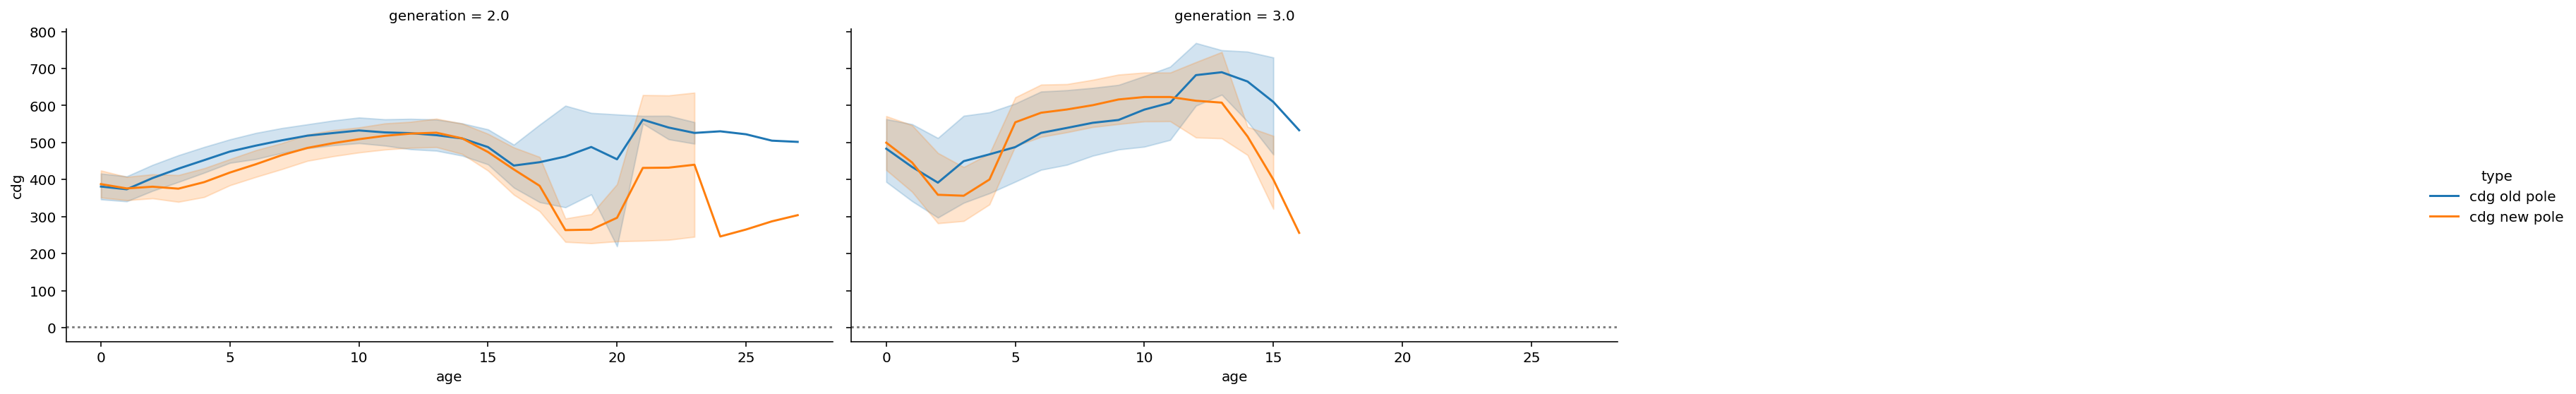

In [54]:
df1091 = df[df['strain']=='AKS1091']

df1 = df1091[['strain','age','cdg_old','id_par','generation','uni_par_id']].copy()
df1['type'] = 'cdg old pole'
df1['cdg'] = df1['cdg_old']

df2 = df1091[['strain','age','cdg_new','id_par','generation','uni_par_id']].copy()
df2['type'] = 'cdg new pole'
df2['cdg'] = df2['cdg_new']

df1091_on = pd.concat((df1, df2),keys=['strain','age','cdg','type','id_par','generation','uni_par_id']).reset_index()

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df1091_on, col="generation", hue='type', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.add_legend()

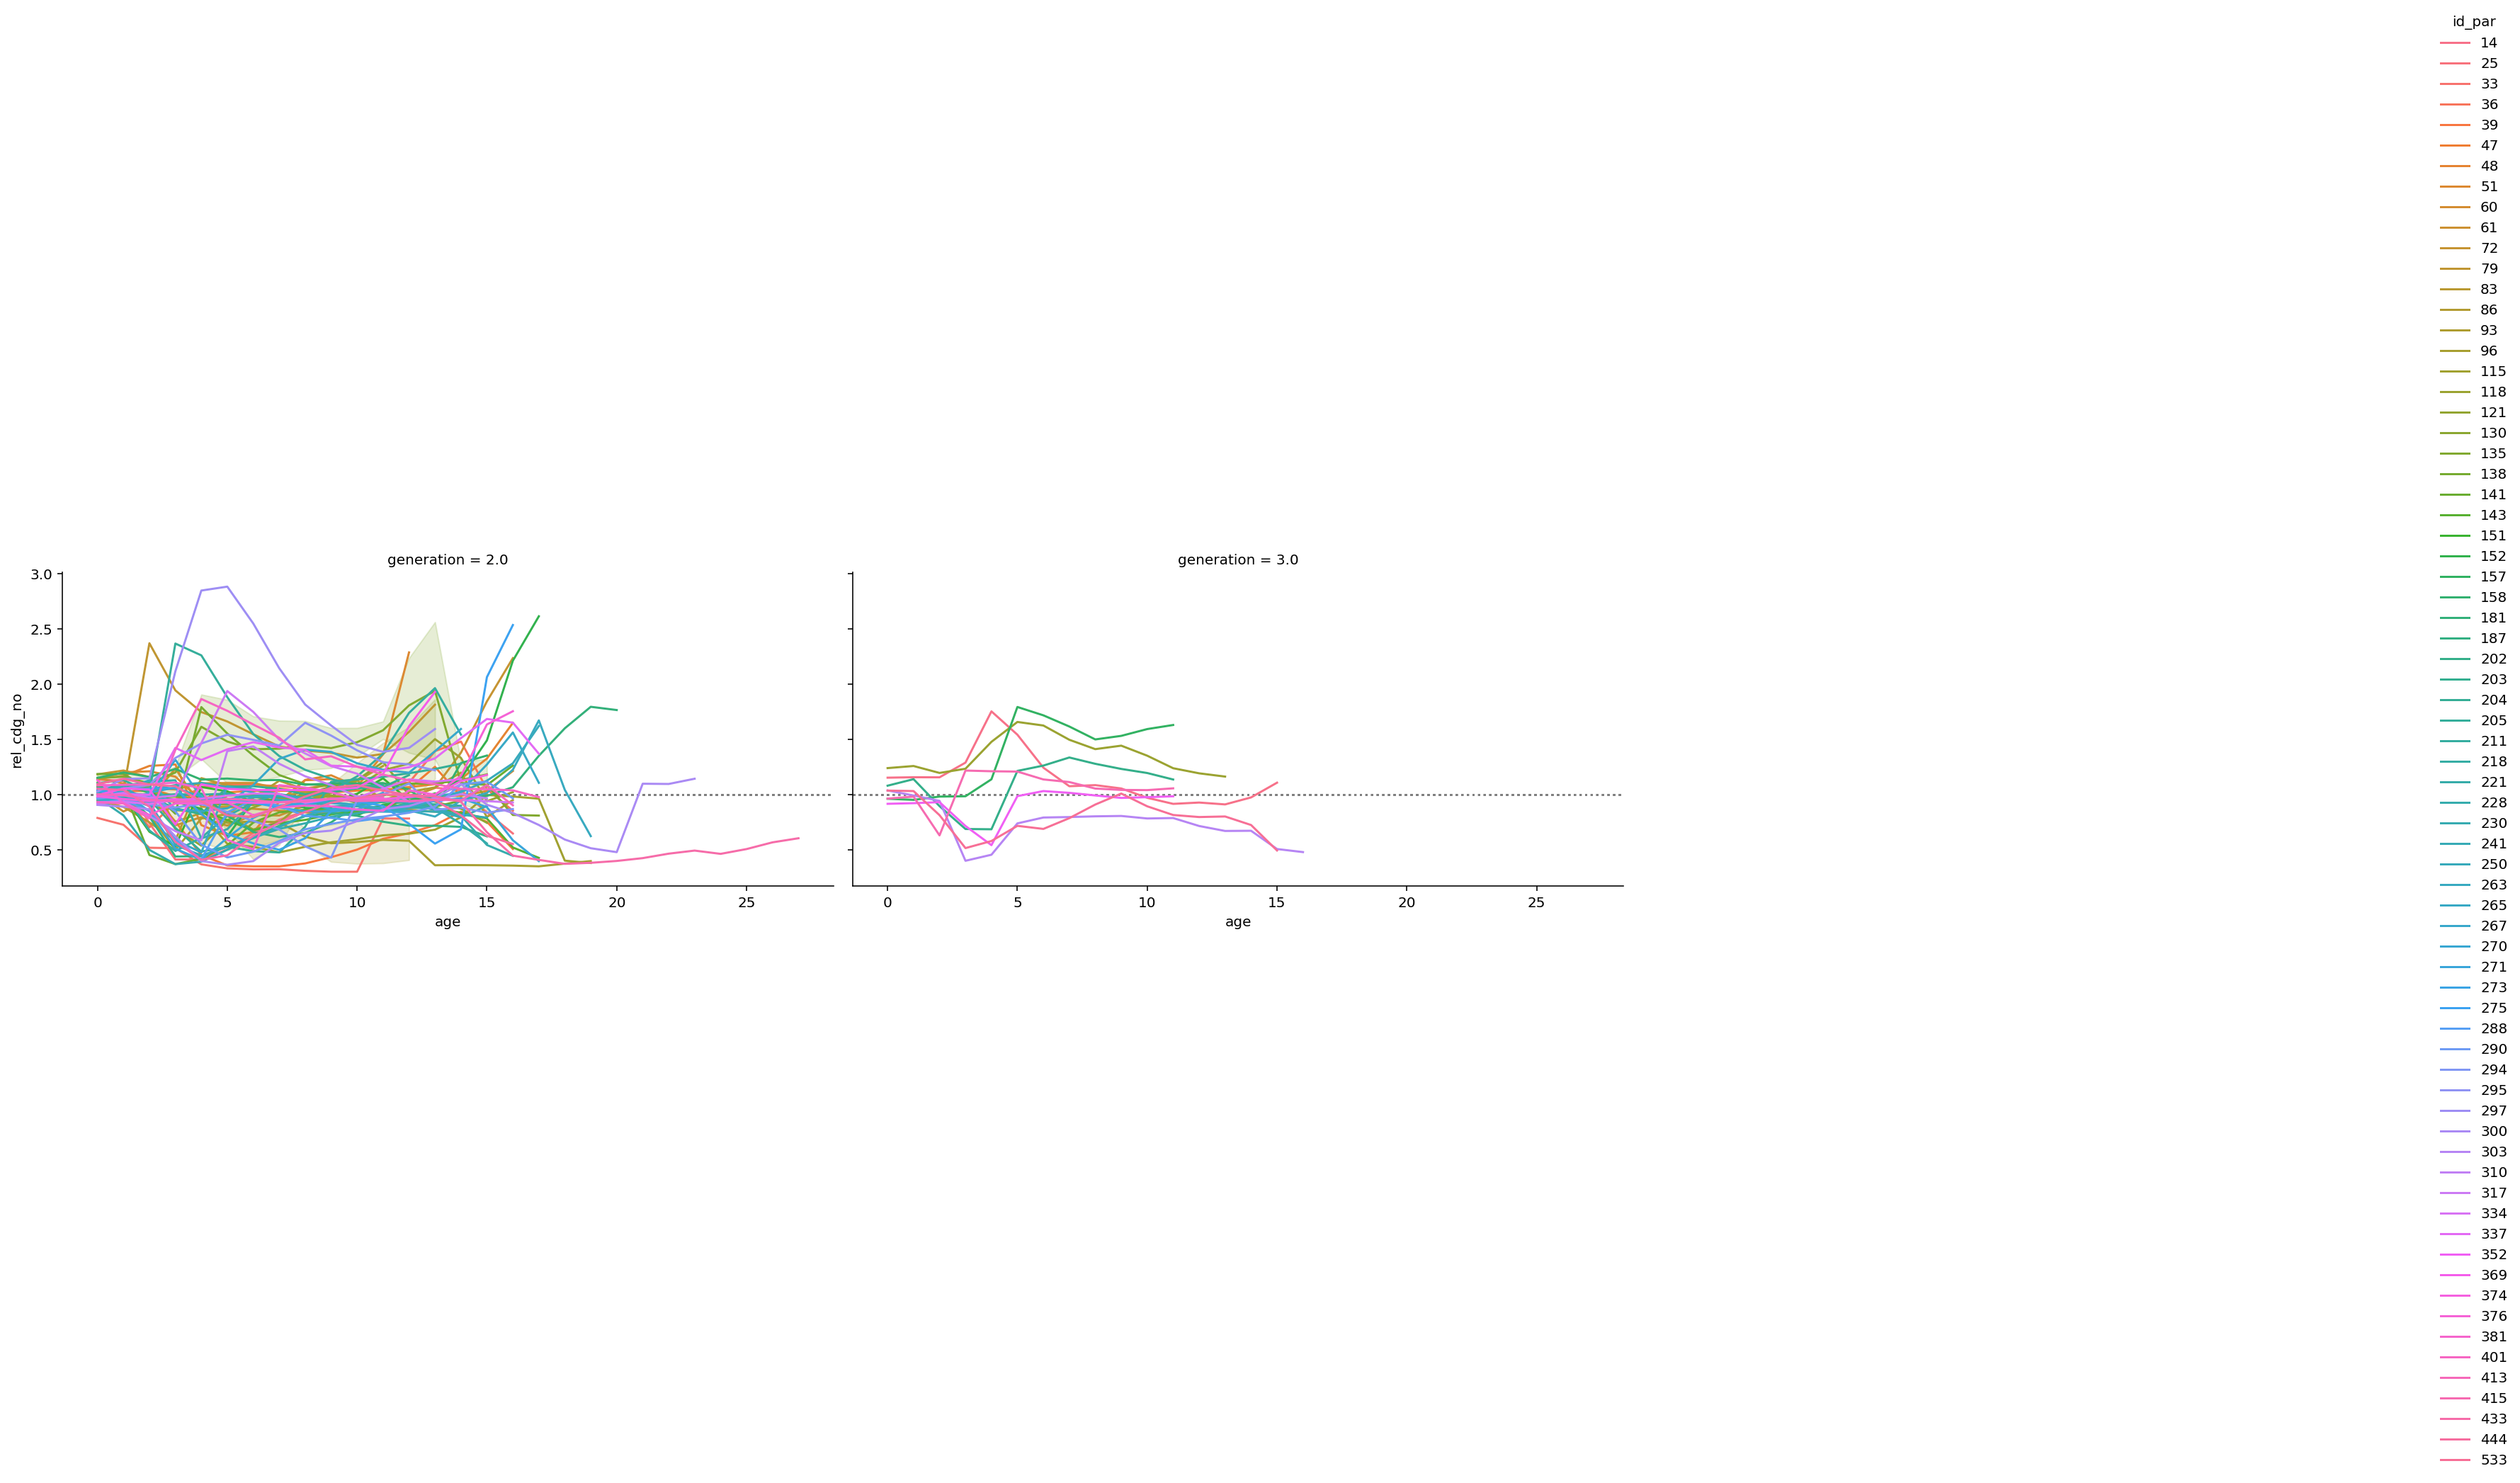

In [58]:
df1091 = df[df['strain']=='AKS1091'].reset_index(drop=True)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df1091, col="generation", hue='id_par', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "rel_cdg_no")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.add_legend()